In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Exploratory data analysis & CLeaning

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
dt = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [38]:
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
dt.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [40]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
to_delete = ['Alley','MasVnrType','FireplaceQu','MiscFeature','Fence','PoolQC','Id']
dt.drop(to_delete,axis = 1,inplace=True)

In [42]:
dt.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
int_columns = dt.select_dtypes(exclude='object').columns
median_int = dt[int_columns].median()
dt[int_columns] = dt[int_columns].fillna(median_int)

### Feature selection 

the plots bellow show the attributes that have a positive correlation with the target variable.


In [ ]:

fig, ax = plt.subplots(int(np.ceil(len([0 for col in dt if dt[col].dtype != 'object']) / 2)-1), 2,figsize=(10,20))
i = 0
corr_m = {col:np.corrcoef(dt['SalePrice'],dt[col])[0][1] for col in dt.columns if dt[col].dtype != 'object' and col != "SalePrice" }
for col in dt.columns:
    if col != "SalePrice" and dt[col].dtype != object :
        ax[i // 2, i % 2].scatter(dt[col], dt['SalePrice'], label=f'corr: {corr_m[col]:.2f}')
        ax[i // 2, i % 2].set_ylabel(col)
        ax[i // 2, i % 2].set_xlabel('Sale Price')
        ax[i // 2, i % 2].legend()
        i += 1
        
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
#we transorm to numirique and check relevance to the target variable
[{col : list(dt[col].unique())} for col in dt if dt[col].dtype == 'object']

In [ ]:
encoder = LabelEncoder()
to_encode = [col for col in dt.columns if dt[col].dtype == 'object']
for col in to_encode:
    dt[col] = encoder.fit_transform(dt[col])

In [ ]:
corr_m2 = {col:np.corrcoef(dt['SalePrice'],dt[col])[0][1] for col in to_encode }
corr_m2

we can notice that most of them have no clear relation with the target

#### forward selection :

In [ ]:
import random

In [ ]:
def forward_feature_selection(x, y, model):

    features = x.columns
    best_score = float("-inf")
    current_features = []
    threshold = len(features)

    while True:
        current_best = None
        for f in features:
            gotbetter = False
            if f not in current_features:
                x_ = x[current_features+[f]]
                score = cross_val_score(model,x_,y,cv=10)
                if score.mean() >= best_score :
                    best_score = score.mean()
                    current_best = f
                    
        if current_best!=None:
            current_features.append(current_best)
        else :
            threshold-= 1
            
        if threshold == 0:
            print(f'-->Best score {best_score}')
            return current_features
    

In [ ]:
corr_m.update(corr_m2)

-->Best score 0.8361952034099216
---->Selected Features: ['OverallQual', 'GrLivArea', 'BsmtQual', 'BsmtFinSF1', 'MSSubClass', 'KitchenQual', 'GarageCars', 'LotArea', 'YearBuilt', 'OverallCond', 'ExterQual', 'Fireplaces', 'BsmtExposure', 'Functional', 'MasVnrArea', 'ScreenPorch', 'Neighborhood', 'SaleCondition', 'WoodDeckSF', 'BsmtCond', 'BsmtFullBath', 'Street', 'RoofMatl', 'PoolArea', 'Exterior1st', 'HeatingQC', 'HouseStyle', 'RoofStyle', 'BldgType', 'GarageType', 'KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'LowQualFinSF', 'Utilities']


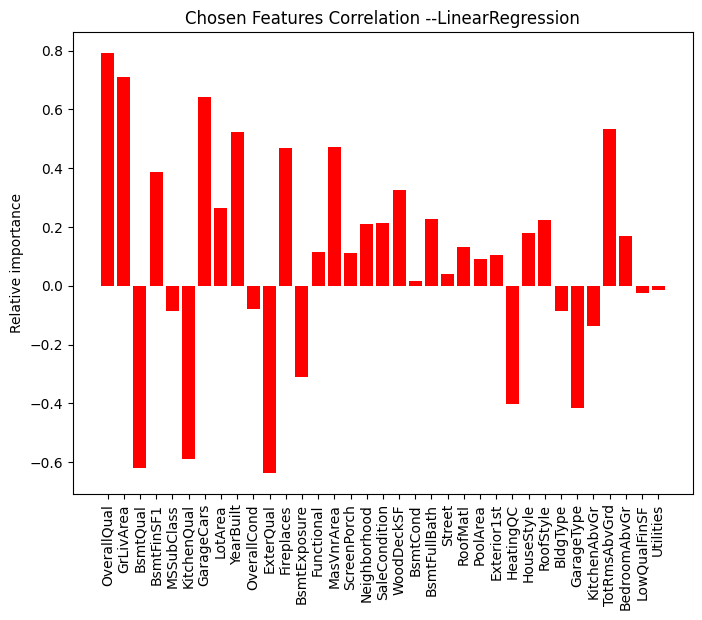

-->Best score 0.7548966506529938
---->Selected Features: ['OverallQual', 'Neighborhood', 'BldgType', 'Utilities']


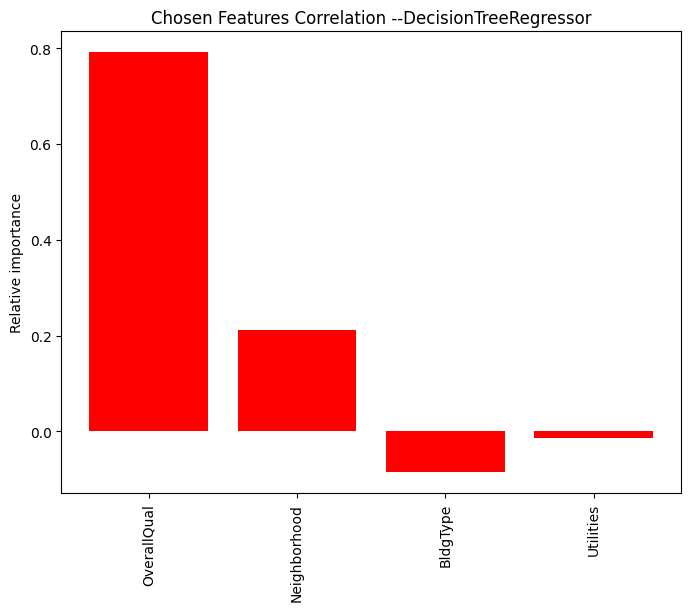

In [35]:

def plot_corr(selected_features,title):
    to_plot = {col:corr_m[col] for col in selected_features }
    plt.figure(figsize=(8, 6))
    plt.title(f"Chosen Features Correlation --{model}")
    plt.bar(range(len(to_plot)),to_plot.values(), color="r", align="center")
    plt.xticks(range(len(to_plot)),to_plot.keys(), rotation=90)
    plt.ylabel("Relative importance")
    plt.show()

    
selected = []
models = { 'LinearRegression':LinearRegression() ,'DecisionTreeRegressor':DecisionTreeRegressor(random_state=0) }

x = dt.drop(['SalePrice'],axis=1)  
y = dt['SalePrice'] 
    
for model in models.keys() :
    selected_features = forward_feature_selection(x, y, models[model])
    selected.append(selected_features)
    print("---->Selected Features:", selected_features)
    plot_corr(selected_features,model)

#### Data preparation

In [116]:
x = dt.drop('SalePrice',axis=1)
y = dt['SalePrice']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
def rmsle(y_true, y_pred):
    squared_log_errors = (np.log(y_pred) - np.log(y_true)) ** 2
    mean_squared_log_error = np.mean(squared_log_errors)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

### Decision Tree Regressor

In [72]:

MODEL = DecisionTreeRegressor(random_state = 1500 ) 
MODEL.fit(x_train,y_train)

y_pred = MODEL.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = p.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rms = rmsle(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination:", r2)
print("Root-Mean-Squared-Error (log):", rms)

Mean Absolute Error: 27090.698630136987
Mean Squared Error: 1779903874.9794521
Root Mean Squared Error: 42188.90701333056
Coefficient of Determination: 0.8970436313678919
Root-Mean-Squared-Error (log): 0.21305742740398698


### XGBRegressor

In [73]:
MODEL3 = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
MODEL3.fit(x_train, y_train)

y_pred = MODEL3.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rms = rmsle(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination:", r2)
print("Root-Mean-Squared-Error (log):", rms)

Mean Absolute Error: 17057.80626605308
Mean Squared Error: 709317238.6416928
Root Mean Squared Error: 26633.010318807235
Coefficient of Determination: 0.8970436313678919
Root-Mean-Squared-Error (log): 0.1469158355252011


### Gradient Regressor

### GradientBoostingRegressor --sklearn

In [75]:

MODEL6 = GradientBoostingRegressor(n_estimators=100)
MODEL6.fit(x_train, y_train)  

y_pred = MODEL6.predict(x_test)  

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rms = rmsle(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination:", r2)
print("Root-Mean-Squared-Error (log):", rms)

Mean Absolute Error: 17078.97614303716
Mean Squared Error: 802173833.0995787
Root Mean Squared Error: 28322.67348079236
Coefficient of Determination: 0.8987664724730684
Root-Mean-Squared-Error (log): 0.1449981320252087


In [93]:
def rmsle(y_true, y_pred):
    squared_log_errors = (np.log(np.abs(y_pred+10e-5)) - np.log(np.abs(y_true+10e-5))) ** 2
    mean_squared_log_error = np.mean(squared_log_errors)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

class GradientBoosting:

    def __init__(self, n_estimators=5, learning_rate=0.1, max_depth=None,decay=None):
        self.lr = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = [] 
        self.decay = decay
        self.w = []
    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)
        
    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'learning_rate': self.lr,
            'max_depth': self.max_depth,
            'decay': self.decay
        }
    
    def fit(self,x,y):

        y_pred = y.mean()
        self.base = y.mean()
        for i in range(self.n_estimators):
            residual =  (y - y_pred)
            tree = xgb.XGBRegressor(eval_metric=rmsle,objective ='reg:squarederror')
            tree.fit(x,residual)
            y_pred += tree.predict(x) * self.lr 
            self.w.append(rmsle(residual,tree.predict(x)))
            self.trees.append(tree)
            if self.decay!=None and self.lr>self.decay :
                self.lr -= self.decay
                
    def predict(self,x):
        y_pred = self.base
        for i,tree in enumerate(self.trees):
            y_pred += self.lr * tree.predict(x) 
        return y_pred

In [94]:
MODEL8 = GradientBoosting(n_estimators=100)
MODEL8.fit(x_train, y_train)  

y_pred = MODEL8.predict(x_test)  

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rms = rmsle(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination:", r2)
print("Root-Mean-Squared-Error (log):", rms)

Mean Absolute Error: 16140.391976134419
Mean Squared Error: 637775236.6813396
Root Mean Squared Error: 25254.212256202718
Coefficient of Determination: 0.9168516149829793
Root-Mean-Squared-Error (log): 0.14249668982059865


The first feature set showed better results then the second one, howerver using the whole dataset showed better results

#### final model 

In [98]:
MODEL = GradientBoosting(n_estimators=100)
MODEL.fit(x, y)
rmsle(y,MODEL.predict(x))

1.6729918359573146e-05

In [117]:
r2_score(y,MODEL.predict(x))

0.9999999990773458

# Sumbittion

In [99]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [100]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [101]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [102]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [111]:
to_delete = ['Alley','MasVnrType','FireplaceQu','MiscFeature','Fence','PoolQC','Id']
int_columns = test.select_dtypes(exclude='object').columns
median_int = test[int_columns].median()
test[int_columns] = test[int_columns].fillna(median_int)
encoder = LabelEncoder()
to_encode = [col for col in test.columns if test[col].dtype == 'object']
for col in to_encode:
    test[col] = encoder.fit_transform(test[col])
x = test.drop(to_delete,axis=1)

In [112]:
prediction = MODEL.predict(x)

In [113]:
to_submit = pd.DataFrame({'Id': test['Id'], 'SalePrice': prediction})

In [114]:
to_submit.to_csv('submission.csv',index=False)